In [1]:
import numpy as np
import finch_functions
from math import pi

In [2]:
finch_e = finch_functions.finchEvolver(N_finches=2)

In [4]:
N_gen = 3

#
print("How fat is the finch? (0-1)")
a = float(input())
    
print("What is the wingspan of the finch? (0-1)")
b = float(input())

print("How big is the finch's beak? (0-1)")
c = float(input())

print("What is the color of the finch? (0-1)")
d = float(input())

print("How strong is natural selection (0-1)")
e = float(input())

print("How much do finches interact (0-1)")
f = float(input())

#theta_i = np.array([pi/2,pi/2,pi/2,pi/2,pi/2,pi/2,pi/2,pi/2])
init_state = np.array([a,b,c,d,a,b,c,d])
theta_i = np.arccos(np.sqrt(init_state))
theta_intra = [[pi/10,pi/10],[pi/10,pi/10]]
theta_inter = [np.arccos(np.sqrt(f)), np.arccos(np.sqrt(f))]

preferred_characteristics = np.array([1,1,1,1,0,0,0,0])
multiplier = e*np.array([1,1,1,1,1,1,1,1])

shots = 50

How fat is the finch? (0-1)


 0.1


What is the wingspan of the finch? (0-1)


 0.5


How big is the finch's beak? (0-1)


 0.3


What is the color of the finch? (0-1)


 0.8


How strong is natural selection (0-1)


 0.2


How much do finches interact (0-1)


 0.1


In [5]:
finch_e.draw_q_circuit(theta_i, theta_intra, theta_inter)

      ┌───────────┐             ┌──────────┐                         ░ »
q_0: ─┤ Rx(1.249) ├──────■──────┤ Rx(π/10) ├─────────────────────────░─»
      └┬─────────┬┘      │      └────┬─────┘            ┌──────────┐ ░ »
q_1: ──┤ Rx(π/4) ├───────┼───────────┼───────────■──────┤ Rx(π/10) ├─░─»
     ┌─┴─────────┴─┐┌────┴─────┐     │      ┌────┴─────┐└────┬─────┘ ░ »
q_2: ┤ Rx(0.99116) ├┤ Rx(π/10) ├─────■──────┤ Rx(π/10) ├─────■───────░─»
     ├─────────────┤└──────────┘            └──────────┘             ░ »
q_3: ┤ Rx(0.46365) ├─────────────────────────────────────────────────░─»
     └┬───────────┬┘            ┌──────────┐                         ░ »
q_4: ─┤ Rx(1.249) ├──────■──────┤ Rx(π/10) ├─────────────────────────░─»
      └┬─────────┬┘      │      └────┬─────┘            ┌──────────┐ ░ »
q_5: ──┤ Rx(π/4) ├───────┼───────────┼───────────■──────┤ Rx(π/10) ├─░─»
     ┌─┴─────────┴─┐┌────┴─────┐     │      ┌────┴─────┐└────┬─────┘ ░ »
q_6: ┤ Rx(0.99116) ├┤ Rx(π/10) ├─────■──────┤ Rx(π/

In [6]:
data = finch_e.multi_generation_evolution_just_data(N_gen, theta_i, theta_intra, theta_inter, preferred_characteristics, multiplier, shots)
print(list(data[0]))
data = list(data[0])

# The order of charateristics
# [color, beak, wingspan, fatness]

# data cached from the real quantum processor
#data = [[0.5 , 0.5 , 0.5 , 0.5 , 0.5 , 0.5 , 0.5 , 0.5 ],
#       [0.52, 0.56, 0.7 , 0.58, 0.46, 0.74, 0.68, 0.62],
#       [0.32, 0.34, 1.3, 0.44, 0.32, 0.54, 0.56, 0.54]]

[array([0.0527864 , 0.22613872, 0.14644661, 0.34188612, 0.0527864 ,
       0.22613872, 0.14644661, 0.34188612]), array([0.  , 0.38, 0.24, 0.16, 0.18, 0.46, 0.24, 0.62]), array([0.36, 0.88, 0.58, 0.94, 0.8 , 0.98, 1.  , 0.88]), array([0.  , 0.06, 0.06, 0.3 , 0.3 , 0.84, 0.58, 0.62])]


In [7]:
# # after got the quantum output
# # start the visualization part

# img_size_x, img_size_y = 612, 533 # the second dimension is the one changing vertically

# # beak triangle
# beak_tri_1_x, beak_tri_1_y =  447, 230
# beak_tri_2_x, beak_tri_2_y = 447, 270
# beak_tri_3_x, beak_tri_3_y = 480, 252

# #wing rectangle:
# left_up_x,left_up_y = 88, 84
# right_down_x, right_down_y = 349, 358

evolution 0
finch 1


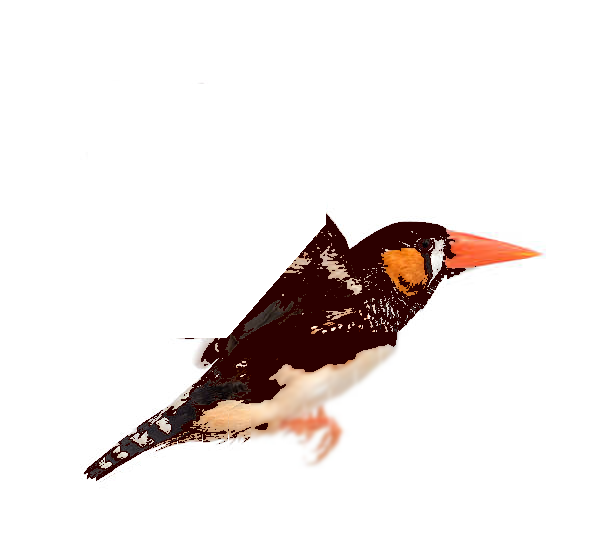

finch 2


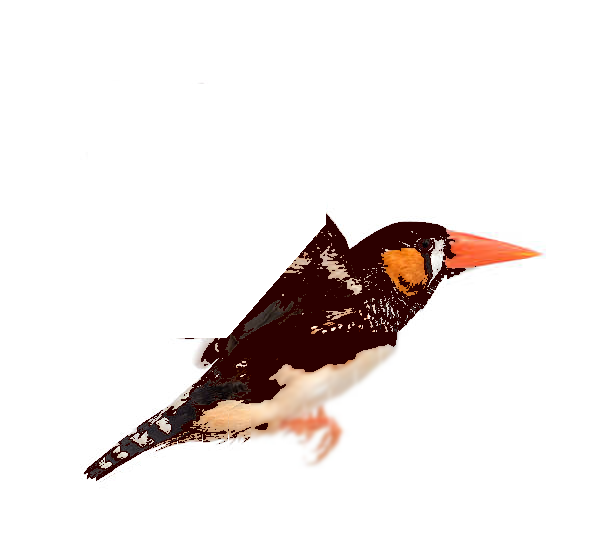

evolution 1
finch 1


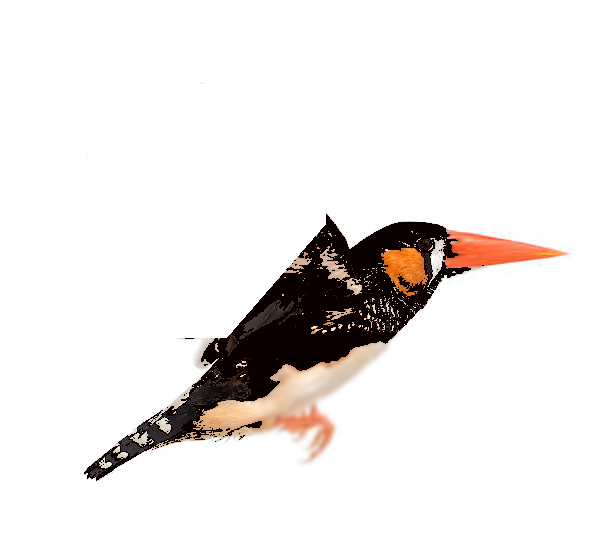

finch 2


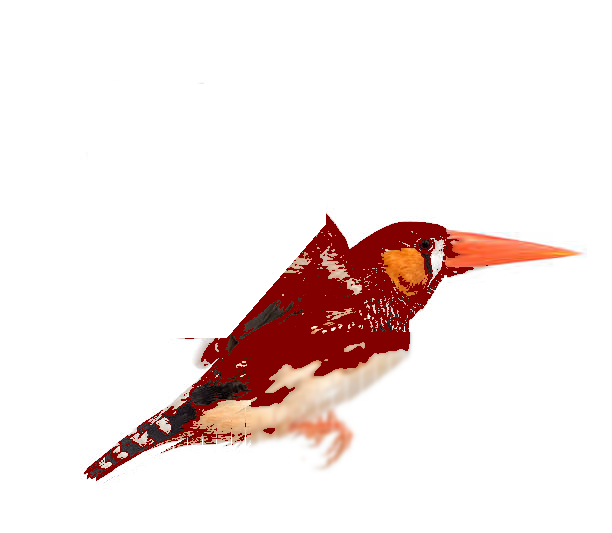

evolution 2
finch 1


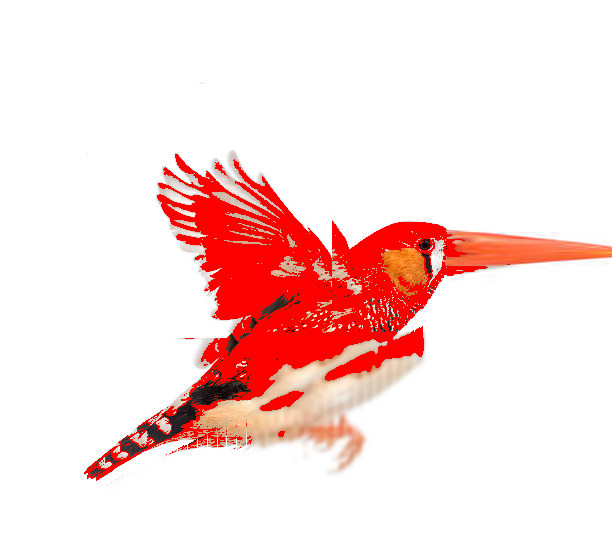

finch 2


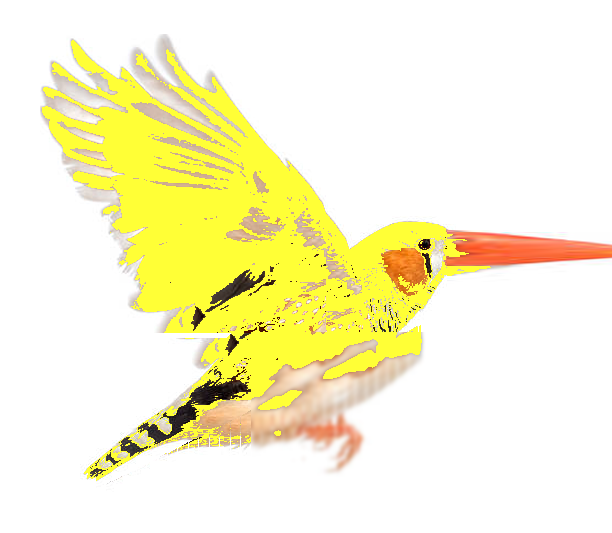

evolution 3
finch 1


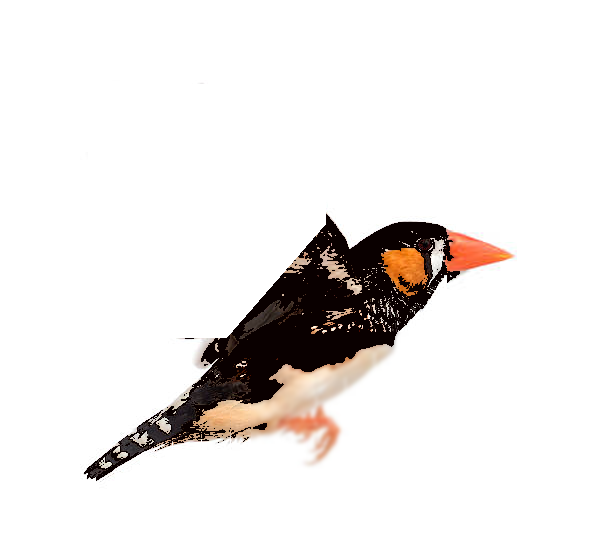

finch 2


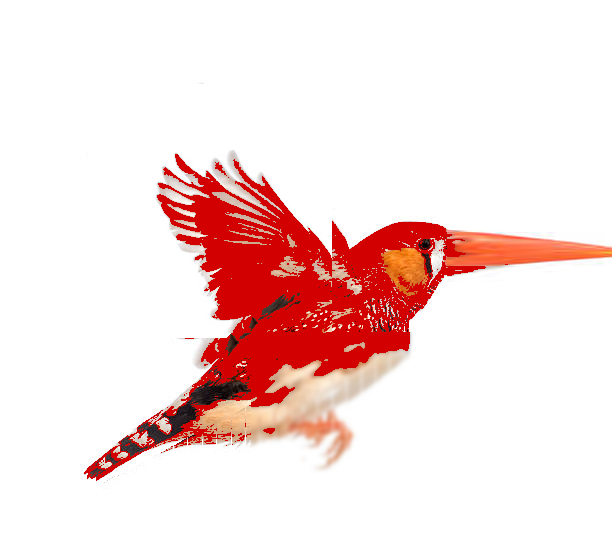

In [8]:
import time
from IPython import display
import visualization

# iterate the evolution and visualize the generated finches
for evl in range(len(data)):
    # in the case we have 2 islands
    first_finch = data[evl][:4]
    second_finch = data[evl][4:]
    print("evolution " + str(evl))
    print("finch 1")
    visualization.visualize_1_evolution("new_row_image.jpeg", "gen_image_color_" + str(evl)  + "_1.png", *first_finch)
    display.display(display.Image(filename="gen_image_color_" + str(evl)  + "_1.png")) # can only display in the main function, cannot display in the for loop
    time.sleep(3)
    
    print("finch 2")
    visualization.visualize_1_evolution("new_row_image.jpeg", "gen_image_color_" + str(evl)  + "_2.png", *second_finch)
    display.display(display.Image(filename="gen_image_color_" + str(evl)  + "_2.png")) # can only display in the main function, cannot display in the for loop
    time.sleep(3)
